<b>Computer vision (CV) is a huge field and is probably one of the trendiest fields. Why?</b>

1) Self-driving cars, Mars Rover, auto-parking vehicles.

2) A lot of libraries out there. Even Web API's. Check out Google's Cloud Vision API.

3) There is marriage of different fields. Working in medicine? Civil engineering? Security?

4) A breakthrough field, deep learning, has its origins in problems in computer vision.

We won't have the time to go to a lot of the foundations in CV, but I'll just post here some images on what could be done -- for everyone's benefit.

### Object Detection and Recognition

In [1]:
from IPython.display import display, Image
display(Image(
        url="http://secondrobotics.com/wp-content/uploads/2015/06/InsideImagenet.png"))

### Image Segmentation

In [3]:
display(Image(url="http://www.cs.tau.ac.il/~wolf/OR/img/street_annotated.jpg"))

### Depth Estimation and Stereoscopic Vision

In [9]:
display(Image(url="http://ttic.uchicago.edu/~ntrinh/Image/mono.jpg",
              width=1000, height=1000))

### Object tracking

In [10]:
display(Image(
url="http://www.mathworks.com/help/examples/vision_product/multiObjectTracking_02.png"))

### Computer vision is NOT computer graphics!

A fundamental difference is that computer vision is concerned with an actual image or video and processing it to be computer models. Computer graphics is the reverse. We come from computer models to generate images or videos.

### Why is computer vision hard?

A computer sees a matrix. Now we're not yet entirely sure how as humans we do this as early as childhood. For now, we'll make use of <b>feature engineering</b> to help us.


In [13]:
display(Image(
url="http://images.slideplayer.com/27/9009513/slides/slide_17.jpg"))

## Feature Engineering CV
Let's gloss over some features that we could use in objects. Say we have this picture, and we want to segment it according to grass and sky.

One such feature we can look at is "texture", the distribution of pixels around a region. If we aggregate that over a larger region, we can get an image's overall texture. We'll take a classic texture feature: Gray level co-occurrence matrix. The GLCM is actually an umbrella term for a lot of features. See the links below for more:

http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

http://www.fp.ucalgary.ca/mhallbey/tutorial.htm

In [15]:
display(Image(
url="http://scikit-image.org/docs/dev/_images/plot_glcm_1.png"))

In [3]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

## Bag of Words descriptors
BOW, as in natural language processing, could be applied in CV as well.

Step 1: Get image patches that are most descriptive in an object.

Step 2: Find a way to describe those patches and make your vocabulary.

Step 3: Find a way to compare similarity between the vocabulary and a new object.

Each of these steps are actually a lively area of research and can be applied to more than object recognition.

In [18]:
display(Image(
url="http://cs.brown.edu/courses/cs143/2011/results/proj3/senewman/wordhistogram.jpg"))

Another example of feature readily available for BOW is DAISY.

http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_daisy.html#example-features-detection-plot-daisy-py

Populating the interactive namespace from numpy and matplotlib


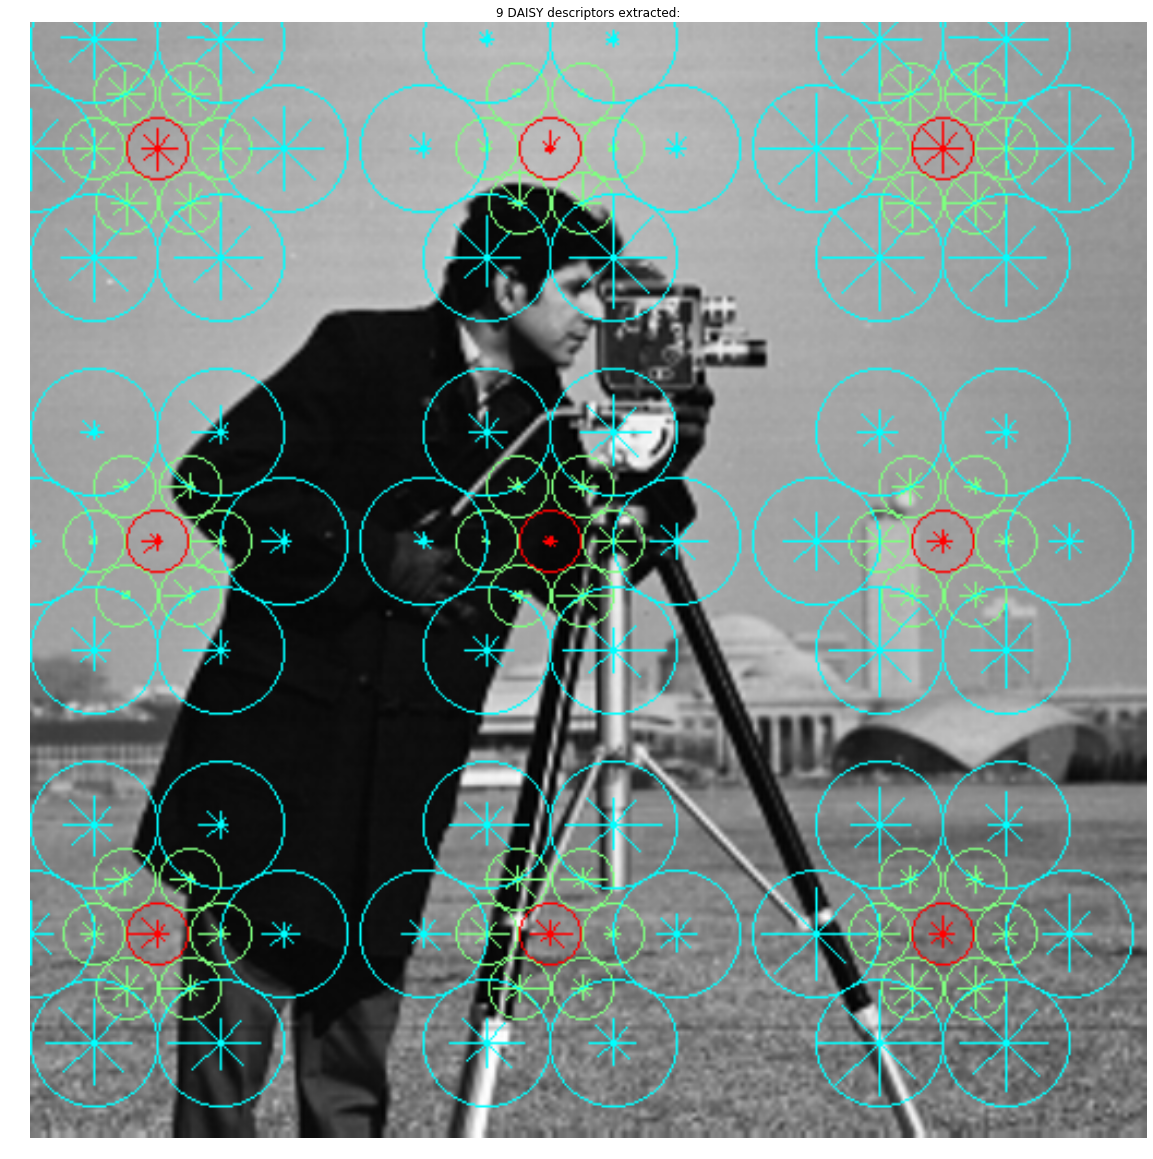

In [25]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt
%pylab inline

img = data.camera()
descs, descs_img = daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [26]:
descs.shape

(3, 3, 104)

Other promising features are:

1) SURF (on OpenCV)

2) Fisher vectors + SURF + multi-scale of the image

3) Gabor Filter responses

However, to some degree, all these are domain-specific. Is there some way to "learn" these features depending on the dataset -- in other words, a general purpose algorithm that can learn from any input?

In [27]:
display(Image(url='http://image.slidesharecdn.com/deeplearningpresentation-\
150419141136-conversion-gate02/95/deep-learning-presentation-7-638.jpg?cb=1429452770',))

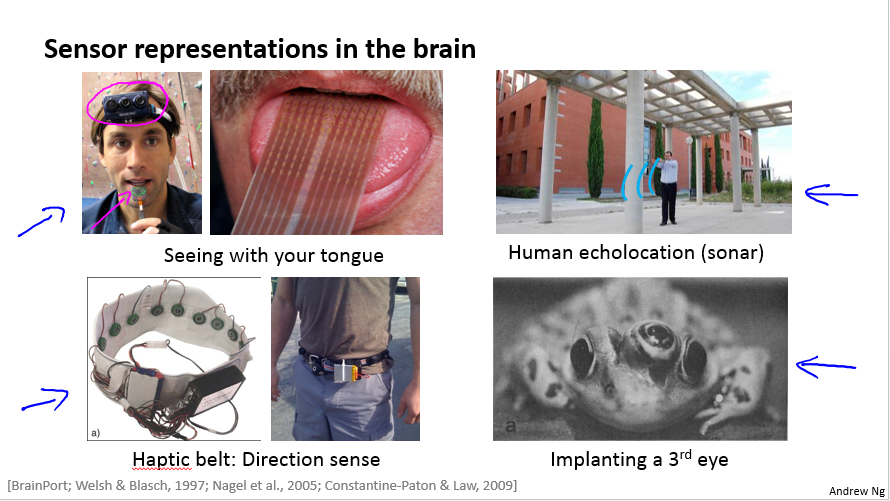

In [29]:
display(Image("../../images/sensory_re.PNG"))

# Entering MNIST
MNIST is probably the most studied dataset in computer vision with regards to object recognition. Over the years, a lot of studies have used this dataset. Yann LeCun has compiled a list of noteworthy publications over the years:
http://yann.lecun.com/exdb/mnist/

For the next parts, we'll be hands-on. At the end, we'll be submitting to Kaggle.

## Using raw pixel features
Raw pixel features could be used. However, we'll have to make sure that our model could take into account the variance in our dataset. First, we'll load up MNIST:

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [10]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [21]:
X.shape

(1797, 64)

In [15]:
X[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

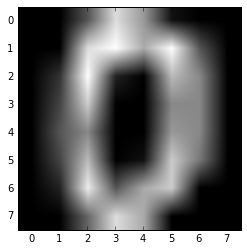

In [22]:
plt.imshow(X[0].reshape(8,8), cmap="gray")

In [42]:
# Implement stochastic gradient descent w/ logistic regression
from sklearn import linear_model
from sklearn import cross_validation as cv
sgd_logres = linear_model.SGDClassifier(loss='log')
print cv.cross_val_score(sgd_logres, X, y, scoring='accuracy')

[ 0.88870432  0.91318865  0.87583893]


In [2]:
dataset = np.loadtxt("../data/train_mnist.csv", 
                     delimiter=",", skiprows=1)
X = dataset[:,1:785]
y = dataset[:,0]

In [3]:
y = np.asarray(y, dtype = np.int8)

In [ ]:
from sklearn import linear_model
from sklearn import cross_validation as cv
sgd_logres = linear_model.LogisticRegression()
cv.cross_val_score(sgd_logres, X, y)

In [ ]:
sgd_logres.fit(X, y)

In [ ]:
test_dataset = np.loadtxt("../data/test_mnist.csv", 
                     delimiter=",", skiprows=1)
Xtest = dataset

In [ ]:
sgd_logres.predict(Xtest)

In [35]:
# Display

In [36]:
# Affine transforms

In [4]:
# convert X to 0 mean and stdev = 1
mean_v = np.mean(X)
stdev_v = np.std(X)
X_norm = X- mean_v
X_norm = X_norm/stdev_v

In [10]:
# convert X_norm into an mxn matrix
X_norm = X_norm.squeeze()
X_norm = X_norm.reshape(-1, 28*28)

In [7]:
from sklearn import linear_model
from sklearn import cross_validation as cv

/home/dylan/GitHub/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
# Implement stochastic gradient descent w/ logistic regression

sgd_logres = linear_model.SGDClassifier(loss='log')
print cv.cross_val_score(sgd_logres, X_norm, y, scoring='log_loss')
print cv.cross_val_score(sgd_logres, X_norm, y, scoring='accuracy')

[-2.49969048 -2.62374242 -2.61430962]
[ 0.88167666  0.8574082   0.8491213 ]


TypeError: fit() takes at least 3 arguments (2 given)

In [70]:
sgd_logres.fit(X_norm, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [71]:
import cPickle as pickle
with open("models/mnist_logres.pickle", 'wb') as model:
    pickle.dump(sgd_logres, model)

A good baseline, but take note that the baseline for this dataset is around 96%.

Next: Let's use a RBF SVM instead. Note that for RBF SVM's, a large sample (>10,000) will take a long time. Therefore, we'll simply take a small subset of the dataset for demonstration.

In [11]:
X_sub = X_norm[:1000]
y_sub = y[:1000]

In [12]:
# Implement stochastic gradient descent w/ logistic regression
from sklearn import svm

rbf_svm = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
print cv.cross_val_score(rbf_svm, X_sub, y_sub)

[ 0.86904762  0.9009009   0.89123867]


How do we increase this? According to Yann LeCun's page, <b> deep learning methods achieve the best results in MNIST</b>. This trend is the same across other image datasets. In fact, no other method has broken so much benchmarks as deep learning.

# Neural Networks and Deep Learning
Deep learning is a super hot field of machine learning that supercharges neural networks by creating hierarchical and invariant representations of the data. In simpler terms <b>it creates its own features</b> that are most relevant to the task, with minimal human intervention.

Sounds like skynet?

Let's review neural networks:
## Biological intution:

Neural networks are simpler versions of the biological brain, but the principle holds. We have units that pass along signals along connections. These connections are representative of the patterns we discover in the data.


In [14]:
from IPython.display import display, Image
display(Image(url='http://webspace.ship.edu/cgboer/neuron.gif',
             width=512,height=256))

In [16]:
from IPython.display import display, Image
display(Image(url='http://scikit-learn.org/dev/_images/multilayerperceptron_network.png',
             width=512,height=256))

## From regression intuition:

If we remove the middle <b> hidden layer </b>we end up with logistic regression. Having the hidden layer combines the features themselves into interaction units. It may even make the functions into higher order polynomials.

## Mathematical intuition:

We are discovering intermediate functions that transform x. In the image below, we have

$$a_{lk}^{(1)} = \sum_{k=0}^mg(\Theta_{lk}^{(1)} x_k)$$

... where the sigmas are like intermediate functions that form the final output:

$$ f(x) = \Theta_1(\Theta_2(...(\Theta_r(x))) $$

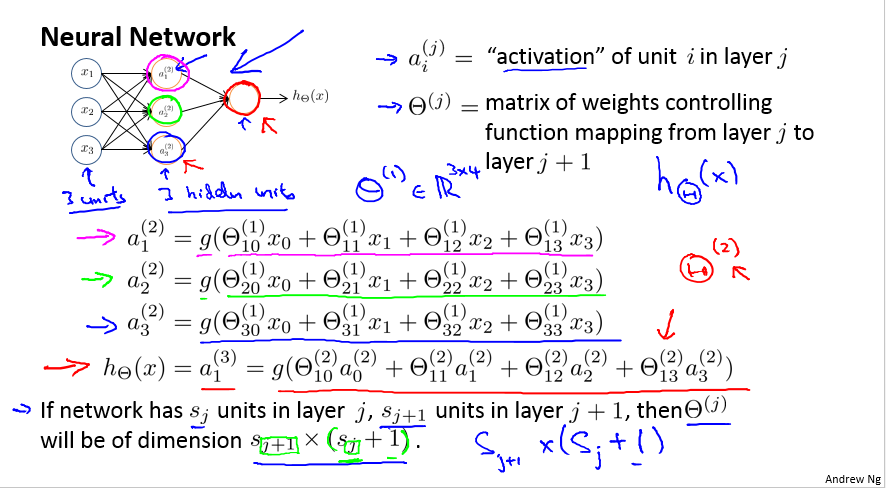

In [19]:
from IPython.display import display, Image
display(Image("../../images/forward_prop.PNG"))

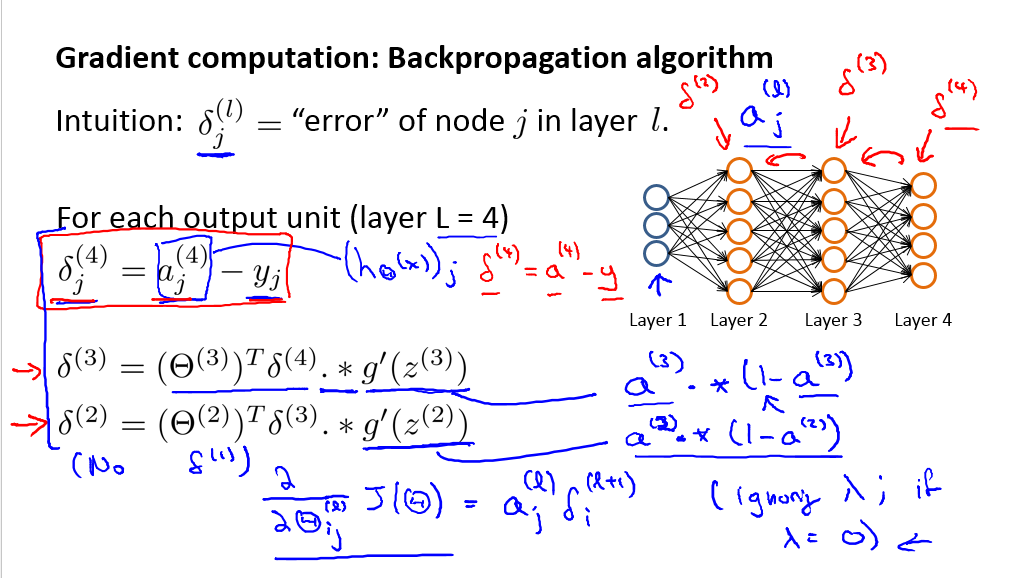

In [18]:
from IPython.display import display, Image
display(Image("../../images/back_prop.PNG"))

What's g(z) then? It is a nonlinear function that maps z to another value. These nonlinearities are important since it affects optimization and the architecture of the network.<b> Without nonlinearities, having multiple hidden layers is equivalent to just having one</b>.

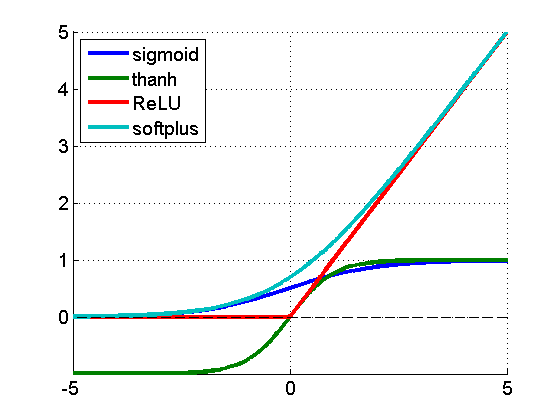

In [21]:
from IPython.display import display, Image
display(Image("../../images/nonlinearities.png"))

## A simple demonstration of nonlinearity

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dylan/GitHub/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


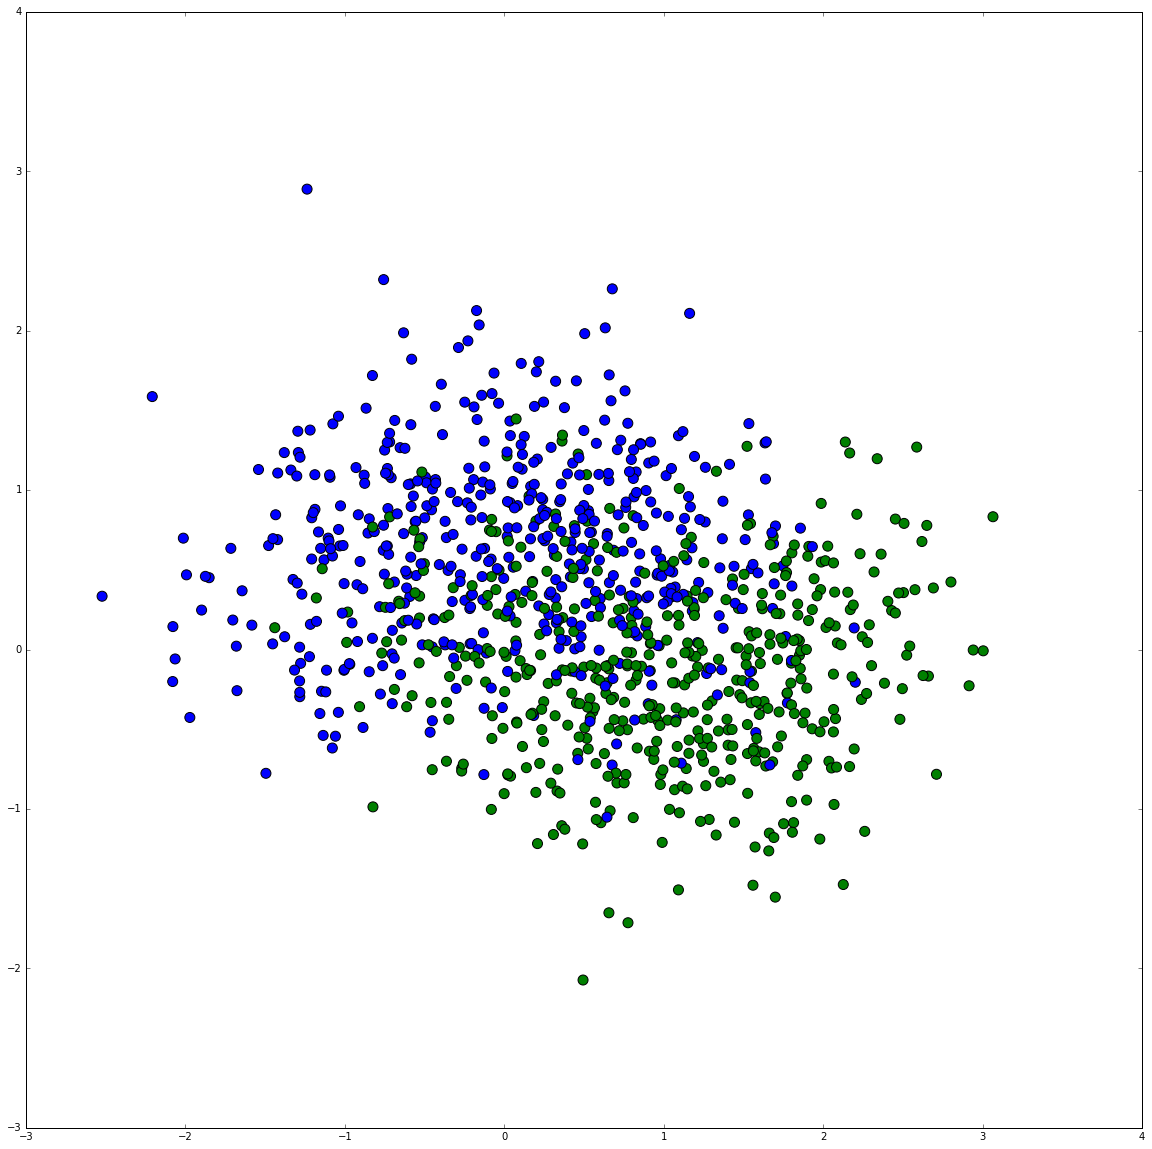

In [2]:
from sklearn import datasets, neural_network
dataset = datasets.make_moons(n_samples=1000, noise=0.5,
                                random_state=1)
X = np.asarray(dataset[0])
y = np.asarray(dataset[1])
plt.figure(figsize=(20,20))
color_wheel = {0: "blue", 1:"green"}

plt.scatter(X[:,0],X[:,1], 
            c=map(lambda x:color_wheel[x], y), s=100)

In [45]:
from sklearn import svm
def plot_data(X, y):
    nn01 = neural_network.MLPClassifier(
        algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1).fit(X,y)
    nn02 = neural_network.MLPClassifier(
        algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1).fit(X,y)
    nn03 = neural_network.MLPClassifier(
        algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1).fit(X,y)
    nn04 = neural_network.MLPClassifier(
        algorithm='l-bfgs', alpha=1e-3, hidden_layer_sizes=(100,), random_state=1).fit(X,y)

    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['Neural network with 5 hidden units',
              'Neural network with 10 hidden units',
              'Neural network with 50 hidden units',
              'Neural network with 50 hidden units regularized'
              ]

    plt.figure(figsize=(20,20))
    for i, clf in enumerate((nn01, nn02, nn02, nn04)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

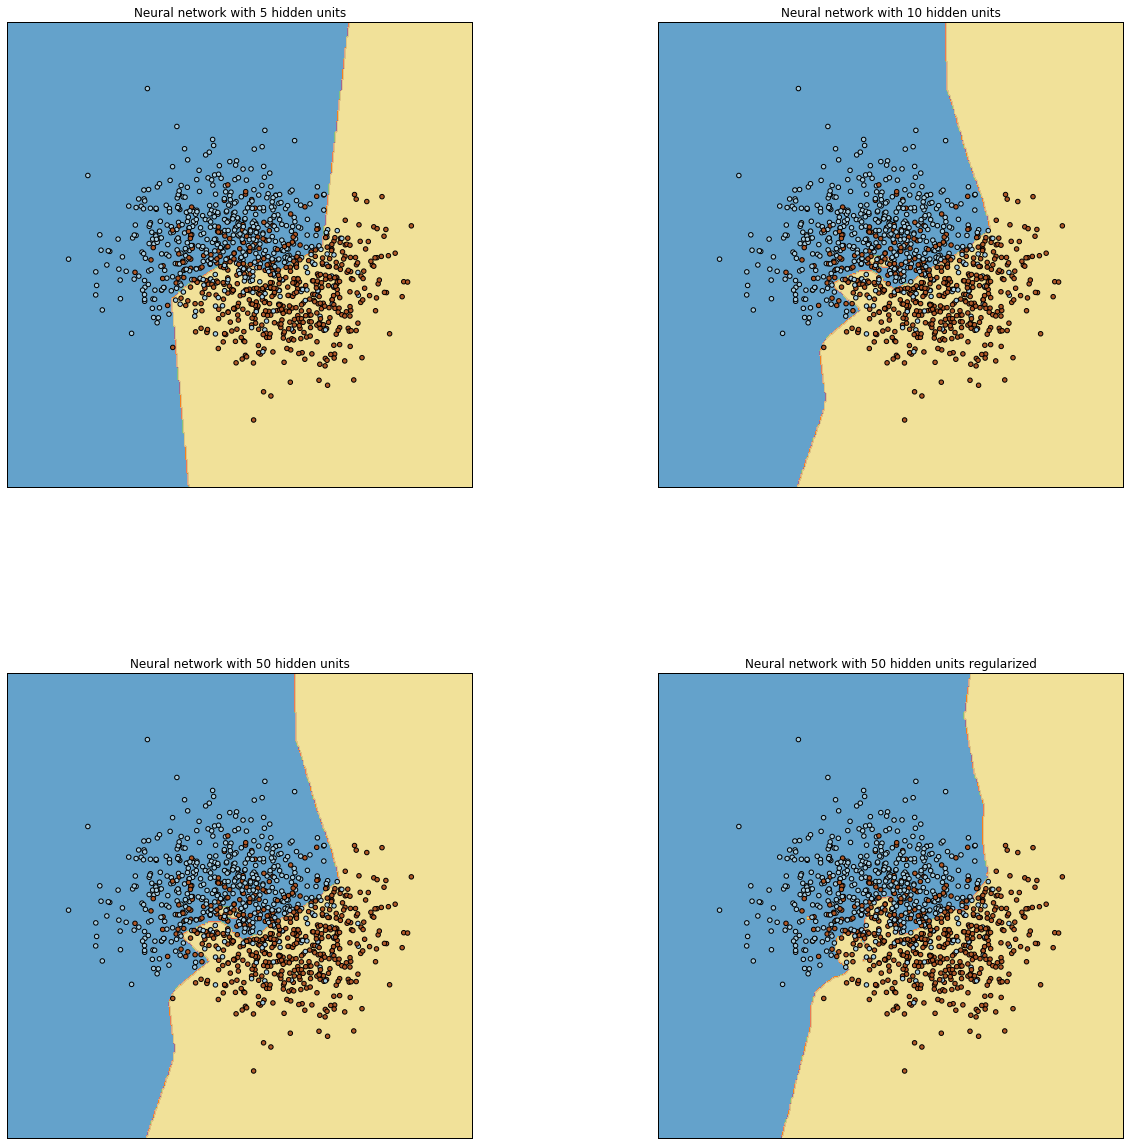

In [46]:
plot_data(X,y)

## Neural nets: Pros, Cons

Crossing over to DL, its advantages are:

1) Even the features and the nonlinearities themselves could be learned a-la one learning hypothesis.

The disadvantages of DL include:

1) DL with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

2) DL requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

3) DL requires GPU's.

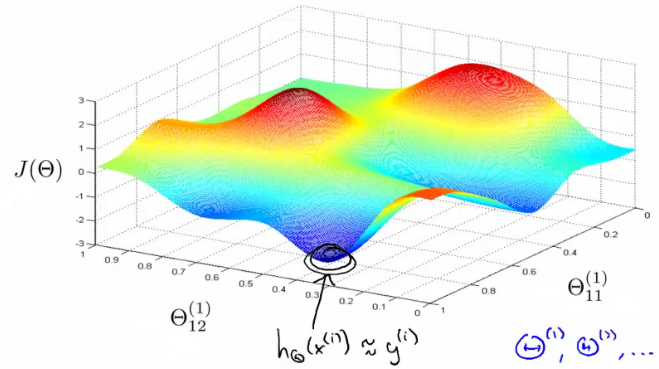

In [47]:
from IPython.display import display, Image
display(Image("http://www.holehouse.org/mlclass/09_Neural_Networks_Learning_files/Image%20%5B35%5D.png"))

# Convolutional Neural Networks

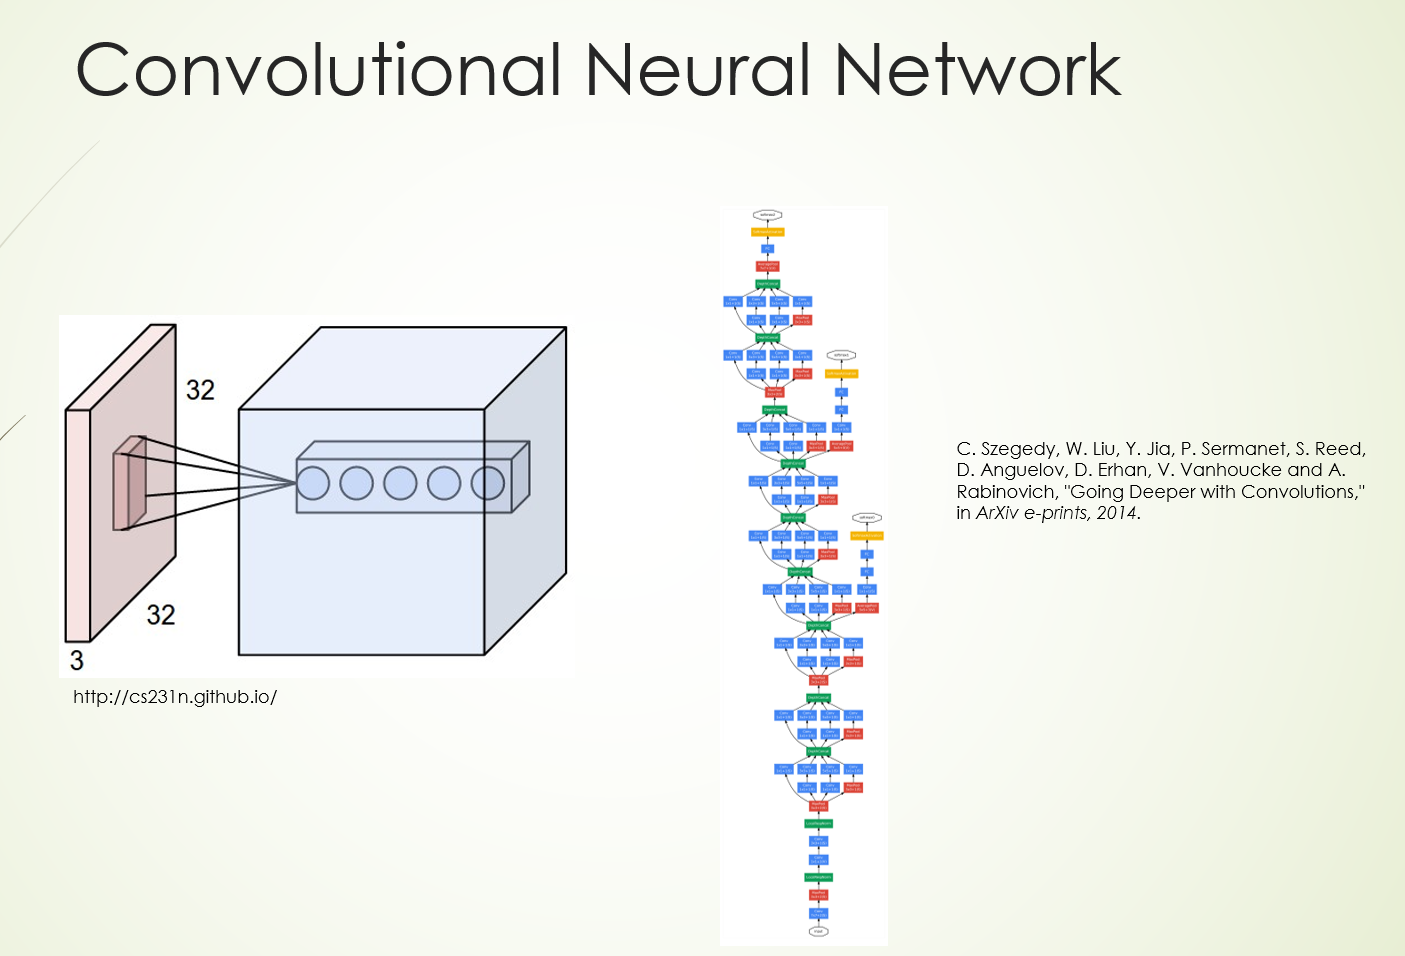

In [48]:
from IPython.display import display, Image
display(Image("../../images/cnn.PNG"))

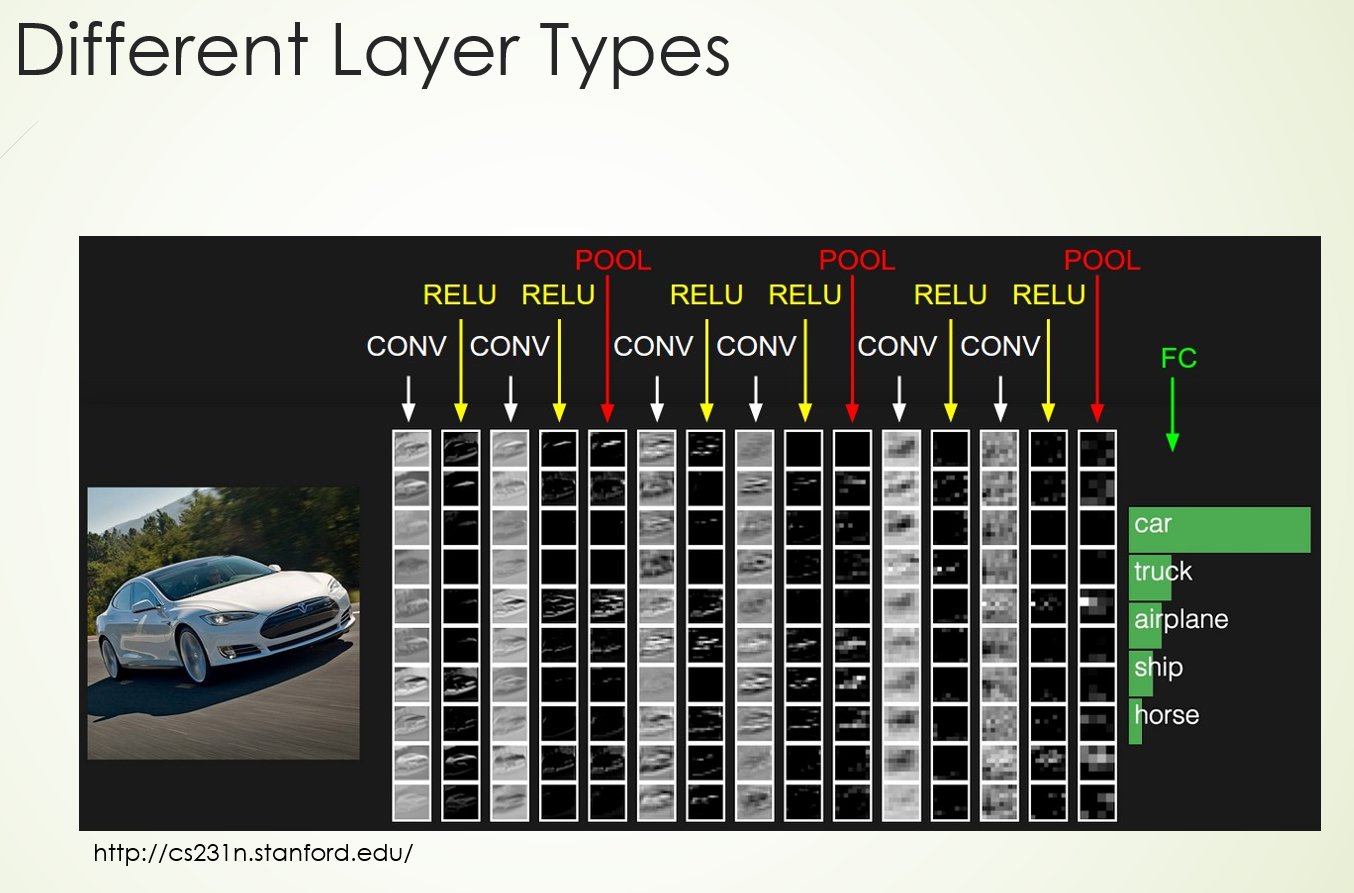

In [49]:
from IPython.display import display, Image
display(Image("../../images/cnn-layers.PNG"))

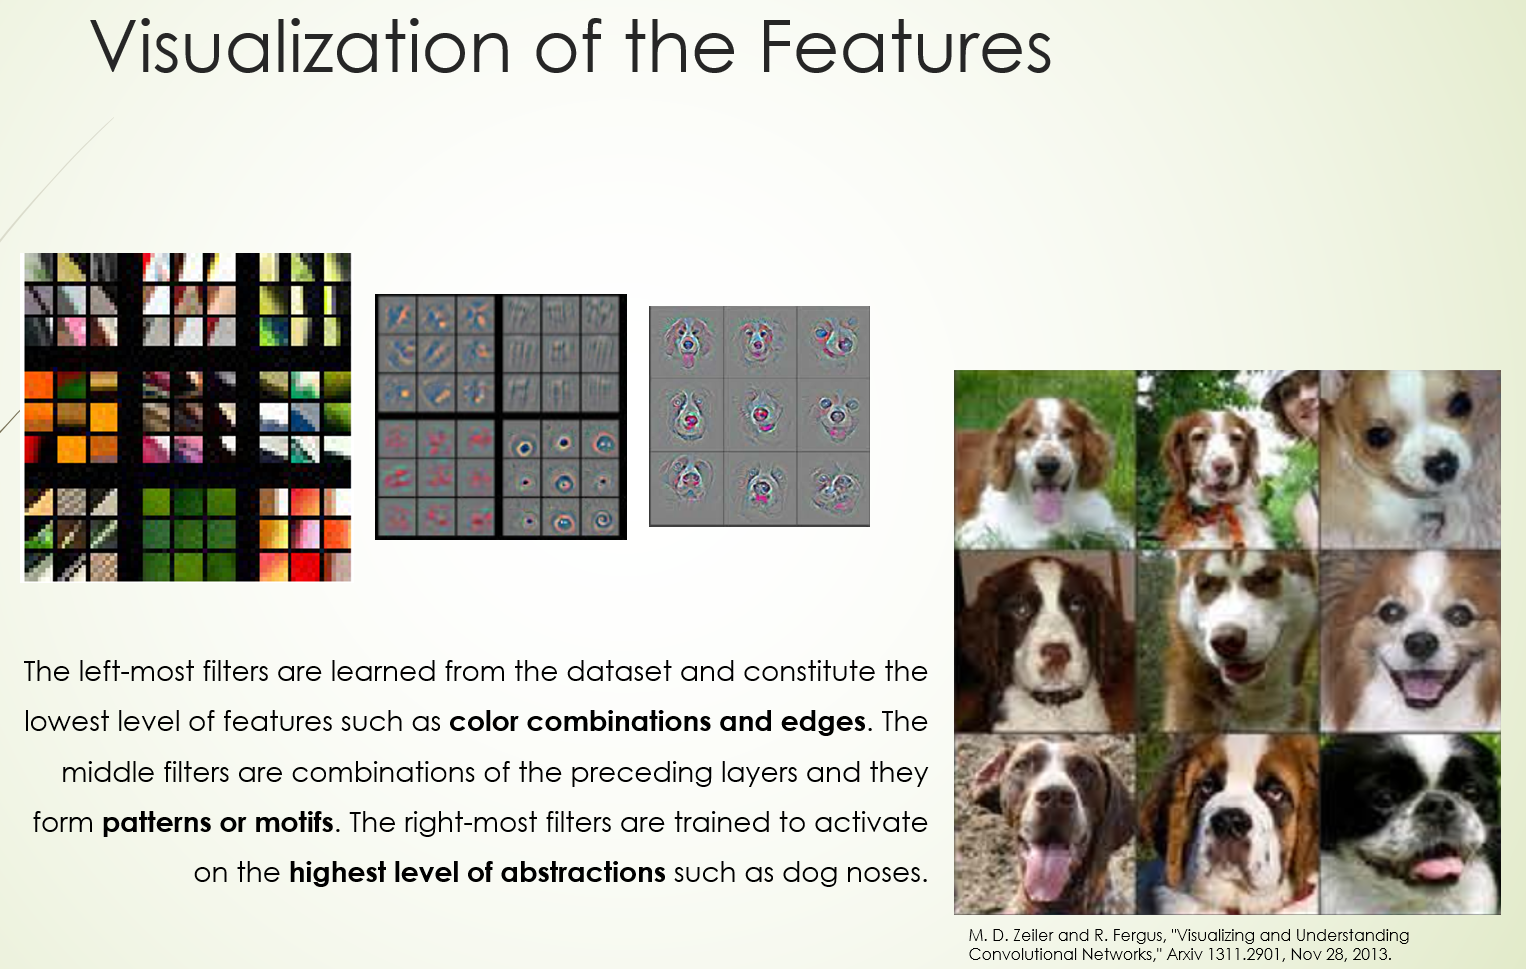

In [50]:
from IPython.display import display, Image
display(Image("../../images/cnn-viz.PNG"))